In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time
import random

#### Reading every image from the directory and converting into grayscale and showing the first image as how it'll look.

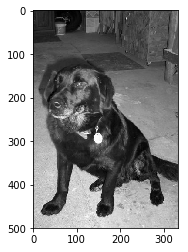

In [10]:
DATADIR = "/CNN - Cat & DOG/images"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)   #Path to dogs or cats dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

#### Now as we know the sizes of every image is different, we have to scale al the images in same size.

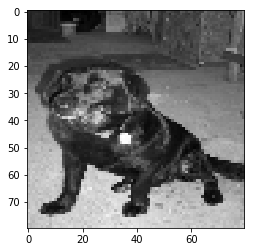

In [18]:
IMG_SIZE = 80

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

#### Creating a function which wil implement both the task which we did above and create a training dataset

In [20]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)   #Path to dogs or cats dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) #To nowmalize the images
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [21]:
print(len(training_data))

24946


#### Shufling the dataset 

In [33]:
random.shuffle(training_data)

for sample in training_data[:5]:
  print(sample[1])  

0
0
0
0
1


In [26]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
#Can't pass a list to neural netowrk have to convert into numpy array

X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE, 1) #1 is for gray scale

#### Saving the model using pickle

In [27]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


#### We are now ready with the input layer data which we are going to put in neural network

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [7]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

First thing to do before we feed data to neural network is to consider normalizing the data
Easiest way is to scale the data and as we here are using image data and we know the minimum and max value(0 and 255) so we can divide it with 255.functions like Keras.utils.normalize are also used to do such taks

In [8]:
X = X/255.0

In [31]:
Name = "Cats-vs-dog-cnn-64*2-{}".format(int(time.time()))

model = Sequential()
#First Layer
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))  #64 is units, (3,3) is window size, 1: is used to skip -1
model.add(Activation("relu")) #Rectifylinear
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Layer
model.add(Conv2D(64, (3,3))) #64 is units, (3,3) is window size, 1: is used to skip -1
model.add(Activation("relu")) #Rectifylinear
model.add(MaxPooling2D(pool_size=(2,2)))

#Now we got 2*64 conv neural network

#Befor we use dense we have to flatten it as dense is 1D and our conv neural network is 2D
model.add(Flatten())
#model.add(Dense(64))

#model.add(Dense(1))
#model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy'])

#model.fit(X,y,batch_size=32, epochs=3, validation_split=0.1)



In [32]:
#Analyzing and optimizing model with Tensor board
from tensorflow.keras.callbacks import TensorBoard
Name = "Cats-vs-dog-cnn-64*2-with-tensorboard-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))

model.fit(X,y,batch_size=32, epochs=3, validation_split=0.1, callbacks = [tensorboard])

Train on 22451 samples, validate on 2495 samples
Epoch 1/3
22451/22451 [==============================] - 439s 20ms/step - loss: 0.6934 - acc: 0.5001 - val_loss: 0.6933 - val_acc: 0.4902
Epoch 2/3
22451/22451 [==============================] - 427s 19ms/step - loss: 0.6932 - acc: 0.4993 - val_loss: 0.6932 - val_acc: 0.4902
Epoch 3/3
22451/22451 [==============================] - 420s 19ms/step - loss: 0.6932 - acc: 0.5005 - val_loss: 0.6931 - val_acc: 0.5098


In [ ]:
To Improve model, thimgs to consider:
#No of layers
#nodes per layer
#Do we have a dense layer in the end or not

In [2]:
import time

#Checking differetn possibilities and will compare the performance
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            Name = "{}-conv-{}-nodes{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(Name)
            
    
    

1-conv-32-nodes0-dense-1565113992
2-conv-32-nodes0-dense-1565113992
3-conv-32-nodes0-dense-1565113992
1-conv-64-nodes0-dense-1565113992
2-conv-64-nodes0-dense-1565113992
3-conv-64-nodes0-dense-1565113992
1-conv-128-nodes0-dense-1565113992
2-conv-128-nodes0-dense-1565113992
3-conv-128-nodes0-dense-1565113992
1-conv-32-nodes1-dense-1565113992
2-conv-32-nodes1-dense-1565113992
3-conv-32-nodes1-dense-1565113992
1-conv-64-nodes1-dense-1565113992
2-conv-64-nodes1-dense-1565113992
3-conv-64-nodes1-dense-1565113992
1-conv-128-nodes1-dense-1565113992
2-conv-128-nodes1-dense-1565113992
3-conv-128-nodes1-dense-1565113992
1-conv-32-nodes2-dense-1565113992
2-conv-32-nodes2-dense-1565113992
3-conv-32-nodes2-dense-1565113992
1-conv-64-nodes2-dense-1565113992
2-conv-64-nodes2-dense-1565113992
3-conv-64-nodes2-dense-1565113992
1-conv-128-nodes2-dense-1565113992
2-conv-128-nodes2-dense-1565113992
3-conv-128-nodes2-dense-1565113992


In [ ]:
import time

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            Name = "{}-conv-{}-nodes{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))
            print(Name)
            
            model = Sequential()
            
            #First Layer - will always have a shape parameter
            model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))  #64 is units, (3,3) is window size, 1: is used to skip -1
            model.add(Activation("relu")) #Rectifylinear
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            
            for l in range(conv_layer-1):
                #Second Layer
                model.add(Conv2D(layer_size, (3,3))) #64 is units, (3,3) is window size, 1: is used to skip -1
                model.add(Activation("relu")) #Rectifylinear
                model.add(MaxPooling2D(pool_size=(2,2)))
            
            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))
            
            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss="binary_crossentropy",
                         optimizer = "adam",
                         metrics = ['accuracy'])

            #model.fit(X,y,batch_size=32, epochs=3, validation_split=0.1)
            model.fit(X,y,batch_size=32, epochs=3, validation_split=0.1, callbacks = [tensorboard])


#### Now we can use tensor board to check which model is performing better and can change the values of dense layers, layer sizes and conv layers if required.

#### Here in this example dense layers didnt worked well as the data size is too small and it memorizes it and so it results in overfitting. /n
#### So we decide to go with 0 dense layers and 3 conv layers with 64 nodes

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            Name = "{}-conv-{}-nodes{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))
            print(Name)
            
            model = Sequential()
            
            #First Layer - will always have a shape parameter
            model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))  #64 is units, (3,3) is window size, 1: is used to skip -1
            model.add(Activation("relu")) #Rectifylinear
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            
            for l in range(conv_layer-1):
                #Second Layer
                model.add(Conv2D(layer_size, (3,3))) #64 is units, (3,3) is window size, 1: is used to skip -1
                model.add(Activation("relu")) #Rectifylinear
                model.add(MaxPooling2D(pool_size=(2,2)))
            
            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))
                model.add(Dropout(0.2))
            
            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss="binary_crossentropy",
                         optimizer = "adam",
                         metrics = ['accuracy'])

            #model.fit(X,y,batch_size=32, epochs=3, validation_split=0.1)
            model.fit(X,y,batch_size=32, epochs=3, validation_split=0.1, callbacks = [tensorboard])

model.save('64*3-CNN.model')

3-conv-64-nodes0-dense-1565122997
Train on 22451 samples, validate on 2495 samples
Epoch 1/3
22451/22451 [==============================] - 410s 18ms/step - loss: 0.6174 - acc: 0.6507 - val_loss: 0.5593 - val_acc: 0.7134
Epoch 2/3
22451/22451 [==============================] - 392s 17ms/step - loss: 0.5050 - acc: 0.7546 - val_loss: 0.4570 - val_acc: 0.7900
Epoch 3/3
22451/22451 [==============================] - 390s 17ms/step - loss: 0.4498 - acc: 0.7910 - val_loss: 0.4433 - val_acc: 0.7904


#### How to use your trained model with new set of images.

#### Here we will load our saved model "64x3-CNN"

In [17]:
import cv2
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]

def prepare(filepath):
    IMG_SIZE = 80
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("64*3-CNN.model")
    

In [25]:
prediction = model.predict([prepare('dog_test.jpg')])
print( CATEGORIES[int(prediction[0][0] )])

Dog


In [26]:
prediction = model.predict([prepare('cat_test.jpg')])
print( CATEGORIES[int(prediction[0][0] )])

Cat
